<a href="https://colab.research.google.com/github/jsuj1th/LAMA-Segmentation/blob/main/LAMA_Inpaint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!ls
!pip install -r "drive/MyDrive/lama-main/requirements.txt"

drive  sample_data


In [ ]:
!pwd
!cd "/content/drive/MyDrive/lama-main"


/content


In [ ]:
!pip list | grep opencv
!pwd

opencv-contrib-python              4.11.0.86
opencv-python                      4.11.0.86
opencv-python-headless             4.11.0.86
/content


In [ ]:
# python3 bin/predict.py model.path=$(pwd)/big-lama indir=$(pwd)/LaMa_test_images outdir=$(pwd)/output
# Instead of cv2.CV_8U, use:
# CV_8U = 0  # The integer value for 8-bit unsigned integer
# !pip install opencv-python==3.
# 4.2.17
# !pip uninstall opencv-contrib-python
# !pip install opencv-contrib-python==4.5.5.64
# !pip install albumentations==0.4.3

# !cd "/content/drive/MyDrive/lama-main"
!pwd
# ! export TORCH_HOME=$(pwd) && export PYTHONPATH=$(pwd)
# !PYTHONPATH=. TORCH_HOME=$(pwd)/drive/MyDrive/lama-main python3 $(pwd)/drive/MyDrive/lama-main/bin/predict.py model.path=$(pwd)/drive/MyDrive/big-lama indir=$(pwd)/data_for_prediction outdir=/content/output  dataset.img_suffix=.jpg > /dev/null

!cd /content/drive/MyDrive/lama-main && \
! pwd
! export TORCH_HOME=$(pwd) && export PYTHONPATH=$(pwd) && \
# ! pwd
! python3 $(pwd)/bin/predict.py \
  model.path=$(pwd)/big-lama \
  indir=$(pwd)/data_for_prediction \
  outdir=/content/output \
  dataset.img_suffix=.jpg


/content
/content/drive/MyDrive/lama-main
/bin/bash: -c: line 2: syntax error: unexpected end of file
python3: can't open file '/content/bin/predict.py': [Errno 2] No such file or directory


In [ ]:
#@title Run this sell to set everything up
print('\n> Cloning the repo')
!git clone https://github.com/advimman/lama.git

print('\n> Install dependencies')
!pip install wldhx.yadisk-direct
!pip install --upgrade pip
!pip uninstall --yes --quiet osqp
!pip install -U scikit-survival
!pip uninstall kornia -y
!pip install kornia --no-dependencies
!pip install kornia-rs
!pip install pytorch-lightning
!pip install hydra-core
!pip install webdataset
!pip install torch torchvision torchaudio torchtext
!pip install -r lama/requirements.txt --quiet
!pip install wget --quiet


print('\n> Changing the dir to:')
%cd /content/lama

print('\n> Download the model')
!curl -L $(yadisk-direct https://disk.yandex.ru/d/ouP6l8VJ0HpMZg) -o big-lama.zip
!unzip big-lama.zip

print('>fixing opencv')
!pip uninstall opencv-python-headless -y --quiet
!pip install opencv-python-headless==4.1.2.30 --quiet
!pip install --upgrade opencv-python


print('\n> Init mask-drawing code')
import base64, os
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
import matplotlib.pyplot as plt
import numpy as np
import wget
from shutil import copyfile
import shutil



canvas_html = """
<style>
.button {
  background-color: #4CAF50;
  border: none;
  color: white;
  padding: 15px 32px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
}
</style>
<canvas1 width=%d height=%d>
</canvas1>
<canvas width=%d height=%d>
</canvas>

<button class="button">Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')

var canvas1 = document.querySelector('canvas1')
var ctx1 = canvas.getContext('2d')


ctx.strokeStyle = 'red';

var img = new Image();
img.src = "data:image/%s;charset=utf-8;base64,%s";
console.log(img)
img.onload = function() {
  ctx1.drawImage(img, 0, 0);
};
img.crossOrigin = 'Anonymous';

ctx.clearRect(0, 0, canvas.width, canvas.height);

ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}

canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}

var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(imgm, filename='drawing.png', w=400, h=200, line_width=1):
  display(HTML(canvas_html % (w, h, w,h, filename.split('.')[-1], imgm, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)


> Cloning the repo
fatal: destination path 'lama' already exists and is not an empty directory.

> Install dependencies
  Using cached osqp-0.6.7.post3-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
Using cached osqp-0.6.7.post3-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (298 kB)
Found existing installation: kornia 0.8.0
Uninstalling kornia-0.8.0:
  Successfully uninstalled kornia-0.8.0
  Using cached kornia-0.8.0-py2.py3-none-any.whl.metadata (17 kB)
Using cached kornia-0.8.0-py2.py3-none-any.whl (1.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.8/29.8 MB 95.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error o

In [ ]:
!pip install opencv-python-headless
import cv2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 63.0 MB/s eta 0:00:00


In [ ]:
fname = None
fname = 'https://ic.pics.livejournal.com/mostovoy/28566193/1224276/1224276_original.jpg' # <-in the example
# fname = 'https://raw.githubusercontent.com/senya-ashukha/senya-ashukha.github.io/master/images/1010286.jpeg'
# fname = 'https://raw.githubusercontent.com/senya-ashukha/senya-ashukha.github.io/master/images/1010287.jpeg'
# fname = "https://raw.githubusercontent.com/senya-ashukha/senya-ashukha.github.io/master/images/alex.jpg"

In [ ]:
import os
os.makedirs('/content/output', exist_ok=True)
!pip install opencv-python
!pip install opencv-contrib-python
!pip install hydra-core==0.11.3
# !pip list | grep hydra


  Attempting uninstall: omegaconf
    Found existing installation: omegaconf 2.3.0
    Uninstalling omegaconf-2.3.0:
      Successfully uninstalled omegaconf-2.3.0
  Attempting uninstall: hydra-core
    Found existing installation: hydra-core 1.3.2
    Uninstalling hydra-core-1.3.2:
      Successfully uninstalled hydra-core-1.3.2


In [ ]:
!pip list | grep torch
# !pip install torchtext==0.12
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

pytorch-lightning                  2.5.0.post0
torch                              2.6.0+cu124
torchaudio                         2.6.0+cu124
torchmetrics                       1.6.3
torchsummary                       1.5.1
torchtext                          0.18.0
torchvision                        0.21.0+cu124
2.6.0+cu124
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user
  Preparing metadata (setup.py) ... canceled
ERROR: Operation cancelled by user
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 106, in _run_wrapper
    status = _inner_run()
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 97, in _inner_run
    return self.run(options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    ret

Will use ./data_for_prediction/1224276_original.jpg for inpainting


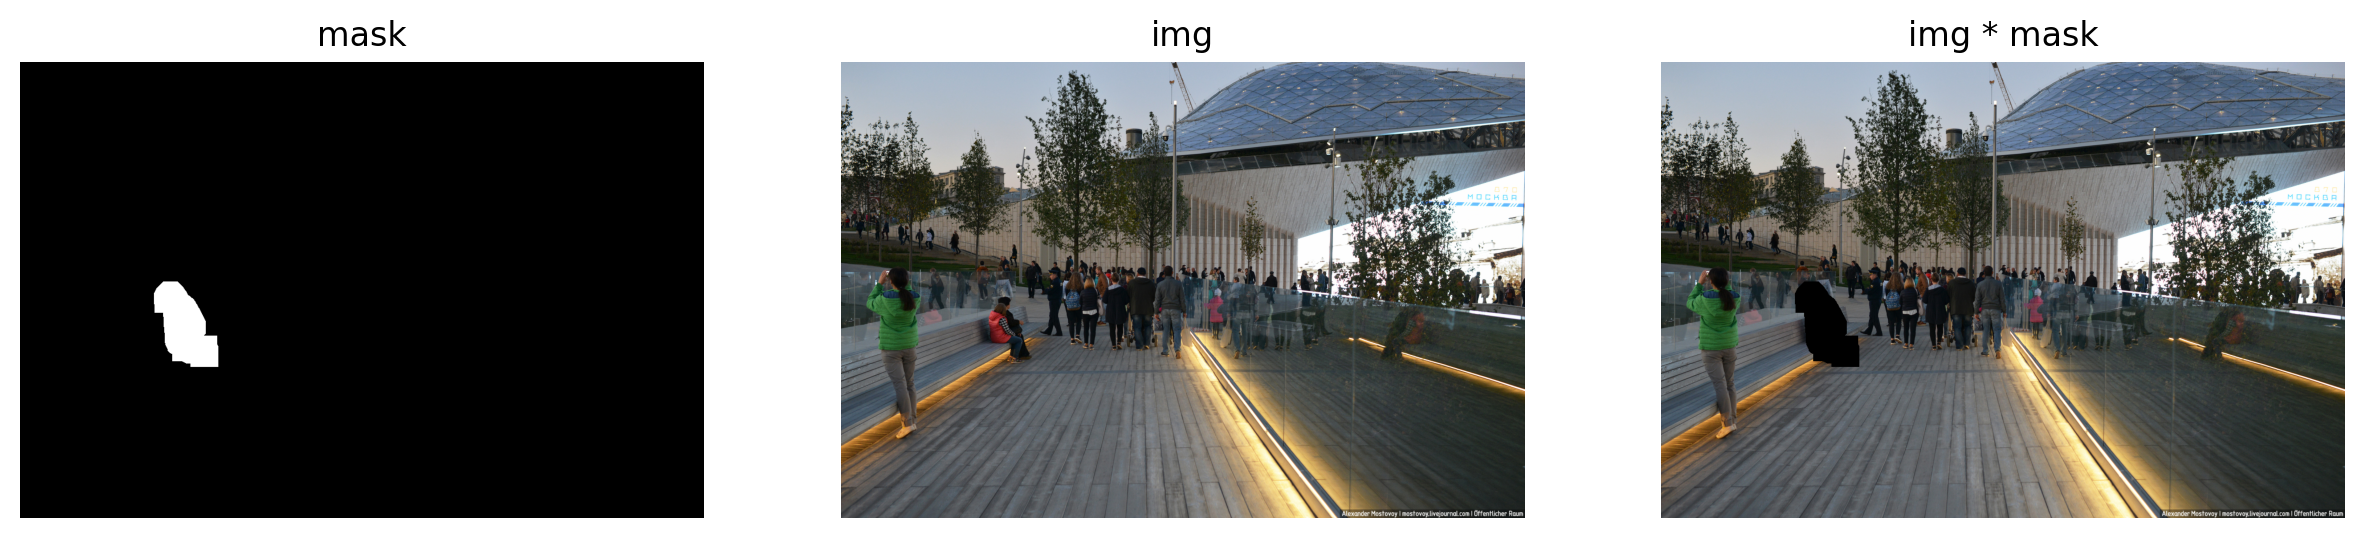

Run inpainting
Traceback (most recent call last):
  File "/content/lama/bin/predict.py", line 31, in <module>
    from saicinpainting.training.data.datasets import make_default_val_dataset
  File "/content/lama/saicinpainting/training/data/datasets.py", line 19, in <module>
    from saicinpainting.training.data.aug import IAAAffine2, IAAPerspective2
  File "/content/lama/saicinpainting/training/data/aug.py", line 1, in <module>
    from albumentations import DualIAATransform, to_tuple
ImportError: cannot import name 'DualIAATransform' from 'albumentations' (/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py)


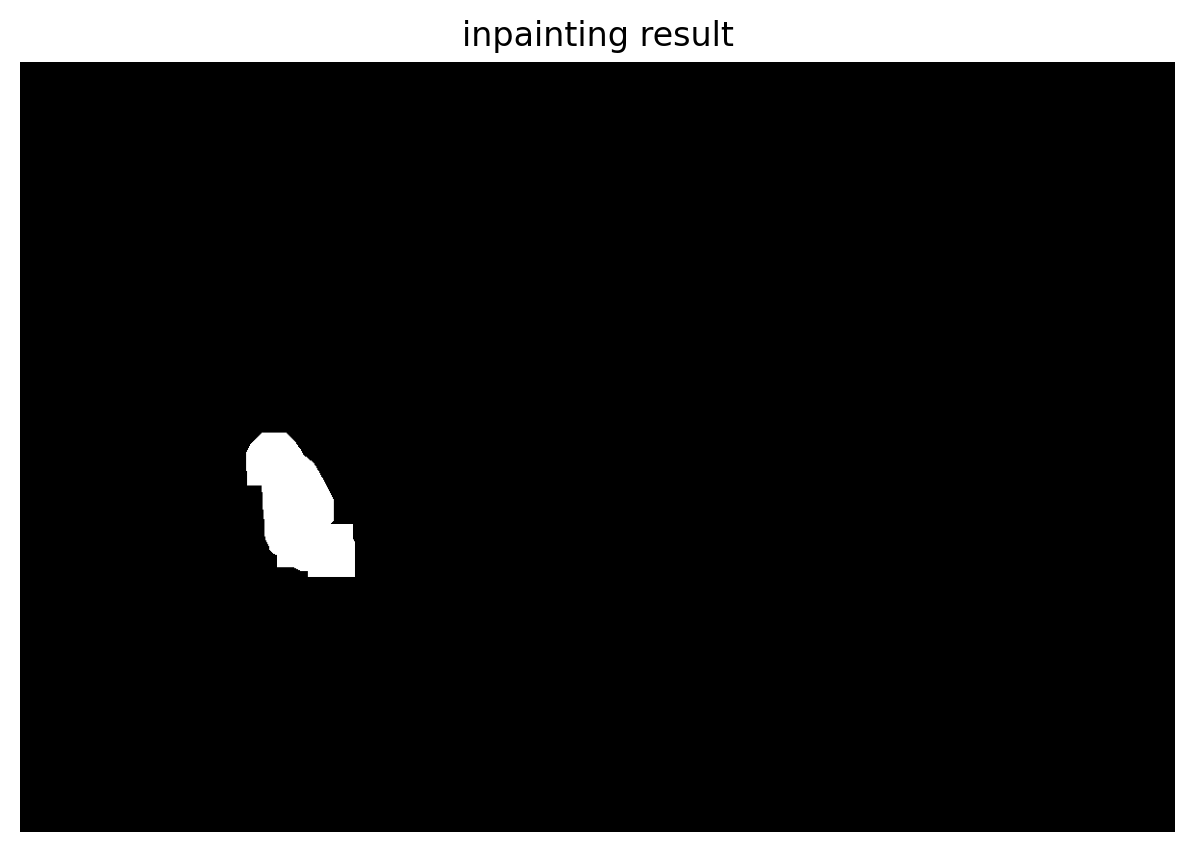

In [ ]:
#@title Draw a Mask, Press Finish, Wait for Inpainting

# import cv2

if fname is None:
  from google.colab import files
  files = files.upload()
  fname = list(files.keys())[0]
else:
  fname = wget.download(fname)

shutil.rmtree('./data_for_prediction', ignore_errors=True)
!mkdir data_for_prediction

copyfile(fname, f'./data_for_prediction/{fname}')
os.remove(fname)
fname = f'./data_for_prediction/{fname}'

image64 = base64.b64encode(open(fname, 'rb').read())
image64 = image64.decode('utf-8')

print(f'Will use {fname} for inpainting')
img = np.array(plt.imread(f'{fname}')[:,:,:3])

draw(image64, filename=f"./{fname.split('.')[1]}_mask.png", w=img.shape[1], h=img.shape[0], line_width=0.04*img.shape[1])
#@title Show a masked image and save a mask
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['figure.dpi'] = 200
plt.subplot(131)
with_mask = np.array(plt.imread(f"./{fname.split('.')[1]}_mask.png")[:,:,:3])
mask = (with_mask[:,:,0]==1)*(with_mask[:,:,1]==0)*(with_mask[:,:,2]==0)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title('mask')
import os
os.makedirs('/content/output', exist_ok=True)

# Save mask to the output directory with a simpler filename
mask_filename = os.path.basename(fname).split('.')[0] + "_mask.png"
output_path = os.path.join('/content/output', mask_filename)
plt.imsave(output_path, mask, cmap='gray')
# plt.imsave(f"./{fname.split('.')[1]}_mask.png",mask, cmap='gray')

plt.subplot(132)
img = np.array(plt.imread(f'{fname}')[:,:,:3])
plt.imshow(img)
plt.axis('off')
plt.title('img')

plt.subplot(133)
img = np.array((1-mask.reshape(mask.shape[0], mask.shape[1], -1))*plt.imread(fname)[:,:,:3])
_=plt.imshow(img)
_=plt.axis('off')
_=plt.title('img * mask')
plt.show()

print('Run inpainting')
if '.jpeg' in fname:
  !PYTHONPATH=. TORCH_HOME=$(pwd) python3 bin/predict.py model.path=$(pwd)/big-lama indir=$(pwd)/data_for_prediction outdir=/content/output dataset.img_suffix=.jpeg > /dev/null
elif '.jpg' in fname:
  !PYTHONPATH=. TORCH_HOME=$(pwd) python3 bin/predict.py model.path=$(pwd)/big-lama indir=$(pwd)/data_for_prediction outdir=/content/output  dataset.img_suffix=.jpg > /dev/null
elif '.png' in fname:
  !PYTHONPATH=. TORCH_HOME=$(pwd) python3 bin/predict.py model.path=$(pwd)/big-lama indir=$(pwd)/data_for_prediction outdir=/content/output  dataset.img_suffix=.png > /dev/null
else:
  print(f'Error: unknown suffix .{fname.split(".")[-1]} use [.png, .jpeg, .jpg]')

plt.rcParams['figure.dpi'] = 200
plt.imshow(plt.imread(f"/content/output/{fname.split('.')[1].split('/')[2]}_mask.png"))
_=plt.axis('off')
_=plt.title('inpainting result')
plt.show()
fname = None

In [ ]:
!pip install segment-anything-py

In [ ]:
# prompt: clone github repo into mounted drive

!git clone https://github.com/geekyutao/Inpaint-Anything.git "/content/drive/My Drive/lama"


fatal: destination path '/content/drive/My Drive/lama' already exists and is not an empty directory.


In [ ]:
!python -m pip install torch torchvision torchaudio
!python -m pip install  segment_anything
!python -m pip install -r "/content/drive/My Drive/lama/lama_requirements_windows.txt"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# !cd "/content/drive/My Drive/lama"
# !pwd
# !bash "/content/drive/My Drive/lama/script/fill_anything.sh"


/content
python3: can't open file '/content/fill_anything.py': [Errno 2] No such file or directory


In [ ]:
# image_path = "/content/drive/MyDrive/1079.png"
image_path="/content/dog.jpg"
import numpy as np
from PIL import Image
import requests
from io import BytesIO

try:
    # Attempt to open the image as a local file
    pil_image = Image.open(image_path)
    # Convert PIL Image to numpy array
    image = np.array(pil_image)
    print(f"Image loaded successfully from {image_path}")
except FileNotFoundError:
    try:
        # If local file not found, try as a URL
        response = requests.get(image_path)
        response.raise_for_status()
        pil_image = Image.open(BytesIO(response.content))
        # Convert PIL Image to numpy array
        image = np.array(pil_image)
        print(f"Image loaded successfully from URL: {image_path}")
    except requests.exceptions.RequestException as e:
        print(f"Error loading image from URL: {e}")
    except Exception as e:
        print(f"Error loading image: {e}")
except Exception as e:
    print(f"Error loading image: {e}")

Image loaded successfully from /content/dog.jpg


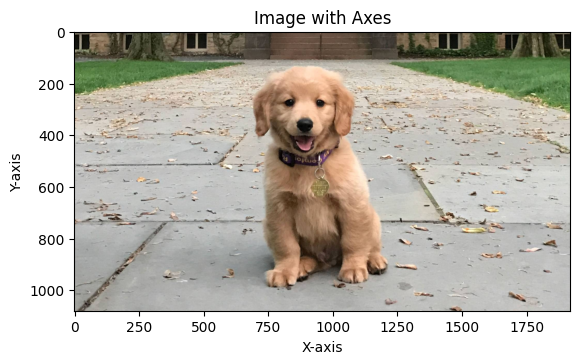

In [ ]:
# prompt: display image with axes

import matplotlib.pyplot as plt

# Assuming 'image' is already defined from the previous code
plt.imshow(image)
plt.axis('on')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Image with Axes")
plt.show()


In [ ]:
!pip install --upgrade hydra-core pytorch-lightning



In [ ]:
!pip install numpy==1.24.3

In [ ]:
!python "/content/drive/My Drive/lama/fill_anything.py" \
    --input_img  "/content/dog.jpg"\
    --coords_type key_in \
    --point_coords 1000 600 \
    --point_labels 1 \
    --text_prompt "fill with tiles in background" \
    --dilate_kernel_size 50 \
    --output_dir ./results \
    --sam_model_type "vit_h" \
    --sam_ckpt "/content/drive/MyDrive/sam_vit_h_4b8939.pth"

# !python "/content/drive/My Drive/lama/remove_anything.py" \
#     --input_img "/content/dog.jpg" \
#     --coords_type key_in \
#     --point_coords 1000 600 \
#     --point_labels 1 \
#     --dilate_kernel_size 15 \
#     --output_dir ./results_doug \
#     --sam_model_type "vit_h" \
#     --sam_ckpt "/content/drive/MyDrive/sam_vit_h_4b8939.pth" \
#     --lama_config "/content/drive/MyDrive/lama/lama/configs/prediction/default.yaml" \
#     --lama_ckpt "/content/drive/MyDrive/lama/pretrained_models/big-lama"

Detectron v2 is not installed
Traceback (most recent call last):
  File "/content/drive/My Drive/lama/remove_anything.py", line 130, in <module>
    img_inpainted = inpaint_img_with_lama(
                    ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/content/drive/My Drive/lama/lama_inpaint.py", line 48, in inpaint_img_with_lama
    with open(train_config_path, 'r') as f:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/lama/pretrained_models/big-lama/models/config.yaml'


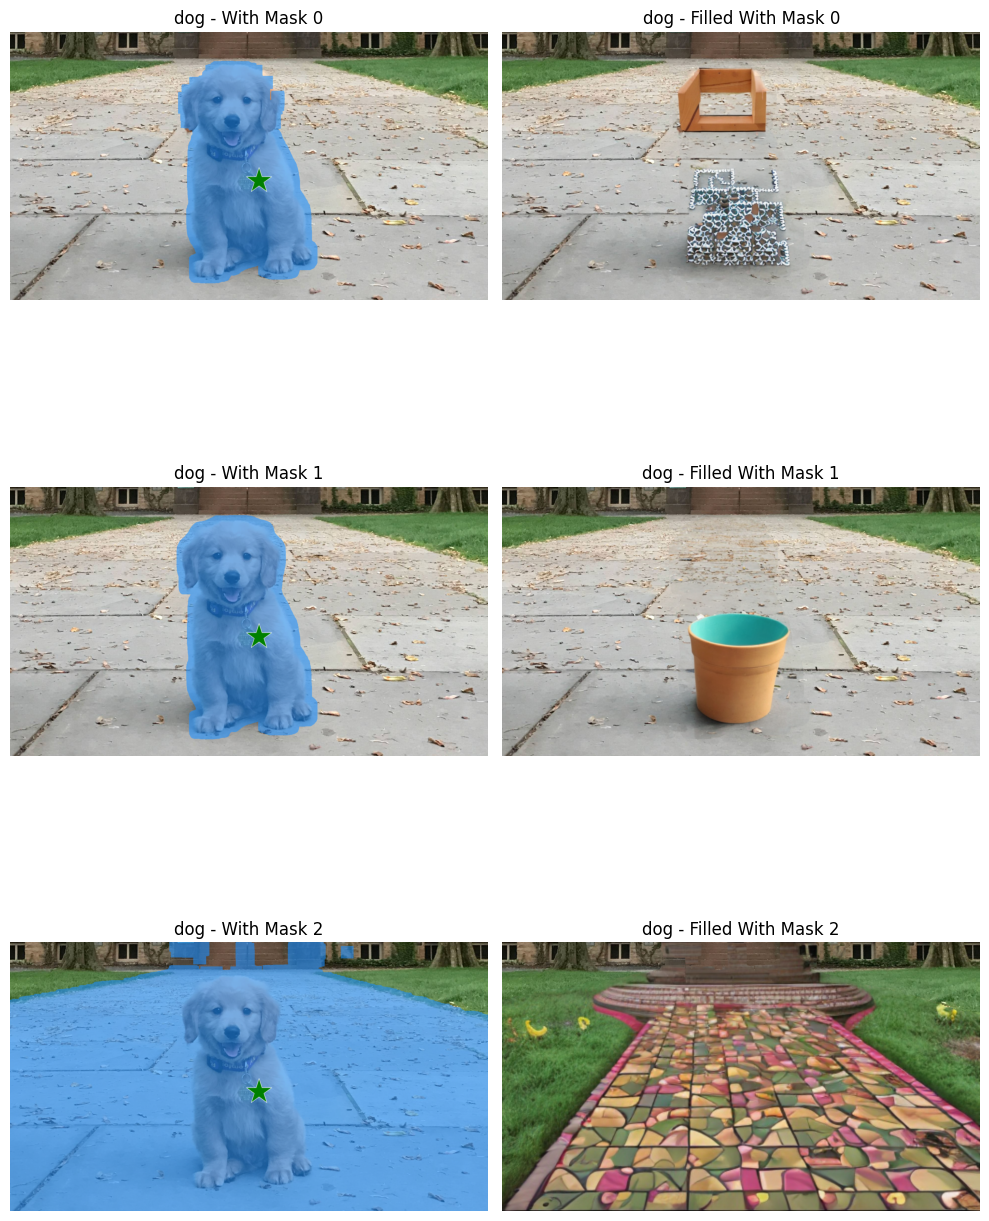

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the output directory path
output_dir = './results'  # Adjust this path if necessary

# List all folders in the output directory
folders = [f for f in os.listdir(output_dir) if os.path.isdir(os.path.join(output_dir, f))]

# Iterate over each folder and generate plots for "with_mask" and "filled_with_mask" images
for folder in folders:
    folder_path = os.path.join(output_dir, folder)

    # Collect "with_mask" and "filled_with_mask" images
    with_mask_images = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.startswith('with_mask')])
    filled_with_mask_images = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.startswith('filled_with_mask')])

    # Generate plots
    plt.figure(figsize=(10, 5 * len(with_mask_images)))  # Adjust figure size based on the number of images

    for i, (with_mask, filled_with_mask) in enumerate(zip(with_mask_images, filled_with_mask_images)):
        # Load images
        with_mask_img = Image.open(with_mask)
        filled_with_mask_img = Image.open(filled_with_mask)

        # Plot "with_mask" image
        plt.subplot(len(with_mask_images), 2, 2 * i + 1)
        plt.imshow(with_mask_img)
        plt.axis('off')
        plt.title(f"{folder} - With Mask {i}")

        # Plot "filled_with_mask" image
        plt.subplot(len(with_mask_images), 2, 2 * i + 2)
        plt.imshow(filled_with_mask_img)
        plt.axis('off')
        plt.title(f"{folder} - Filled With Mask {i}")

    # Show and save the plot for the current folder
    plt.tight_layout()
    plt.show()
